In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import stats
from scipy.optimize import minimize, brent
from decimal import Decimal

%matplotlib inline

# Basic Probabilities

Let's start by discussing probabilities as mathematical entities and some of the basic properties they have. We will start slow, then build up. First, a probability of some variable $x$ is notated as $P(x)$. $P(x)$ can take a variety of forms (e.g., a delta function, a Gaussian, a Lorentzian, an empirically derived histogram, etc.), but to be properly defined, it must yield unity when integrated over all $x$. This is called normalization:

$$ \int_{\infty}^{\infty} P(x)\ dx\ =\ 1$$

### Question: What are the units of $P(x)$ have?

Answer: $P(x)$ has units of $x^{-1}$

We can expand our concept of probability to an arbitrary number of dimensions: $P(x_1, x_2, ..., x_n)$. When dealing with multiple dimensions, it is often clearer to use brackets, $P(\{x_i\})$, or bold quantities, $P(\mathbf{x})$. 

The same normalization condition must exist:

$$\int_{\infty}^{\infty}\ \int_{\infty}^{\infty}\ ...\ \int_{\infty}^{\infty} P(x_1, x_2, ..., x_n)\ dx_1\ dx_2\ ...\ dx_n = 1 $$

Clearly, the short-hand descriptions are clearer here:

$$ \int_{\infty}^{\infty} P(\{x_i\})\ d\{x_i\}\ =\ 1 $$

Integration is usually assumed to be over the entire domain, which is usually $-\infty$ to $+\infty$, but on occasion differs. Angles are an obvious example. For instance, if we are integrating over the entire sky, we need to integrate over both a polar angle (for instance, declination: $\delta$) from 0 to $\pi$ and an azimuthal angle (for instance, right ascension: $\alpha$) for 0 to $2\pi$. 

Let's take the example of something that happens isotropically over the entire sky, so that $P(\Omega)\ \propto\ 1$. Note that we cannot claim that $P(\Omega)\ =\ 1$, since we have not guaranteed that $P(\Omega)$ integrates to unity. Rather, $P(\Omega)\ =\ C$, where $C$ is some constant which we will now solve for. Our normalization conditions is the following:

$$ \int\ P(\Omega)\ d\Omega = 1 $$
$$ \int\ C\ d\Omega = 1 $$

But, how do we actually solve this integral? We convert from $\Omega$ to $\theta$ (polar angle) and $\phi$ (azimuthal angle) using what is called a Jacobian transformation. More on this later. For now, we can simply note that $d\Omega = \sin(\theta)\ d\theta\ d\phi$. Our integral becomes:

$$ \int_0^{\pi} \int_0^{2\pi}\ C\ \sin(\theta)\ d\phi\ d\theta = 1 $$

Now, we can solve this integral:

$$ \int_0^{\pi} 2\pi\ C\ d\theta = 1 $$
$$ \int_0^{\pi} 2\pi\ C\ \sin(\theta)\ d\theta = 1 $$
$$ 4\pi\ C\ = 1 $$

And we find that:

$$ C = \frac{1}{4\pi}$$.

Of course had we thought about the problem right from the start, we would have known that the entire sky contains $4\pi$ steradians, and we could have immediately determined the value of $C$ from our initial equation: $ \int\ C\ d\Omega = 1 $

### Question: What are the units of $P(\Omega)$?

Answer: $P(\Omega)$ has units of $\Omega^{-1}$. It does *not* have units of $\theta^{-1}\phi^{-1}$.

The value of normalization and units when understanding statistics cannot be overstated. It is crucial, and the source of many errors in statistical analyses are due to a poor grasp on these concepts.

# Conditional Probabilities - Conceptual introduction

Now, let's discuss the concept of conditional probabilities, by introducing it with a story. Say you and a friend are walking on a beach. Your friend comes up with the idea to get into the water and go swimming. Unfortunately, you have a particularly debilitating case of galeophobia, which, as the Greeks among us probably already know, means you are afraid of sharks and cannot even put one little toe in the water without crippling thoughts entering through your head of a dorsal finned killer unchanged by evolution for a hundred millenia, an apex predator unrivaled by any within its saline domain. Anyway, your friend, obviously someone with a talent for collecting and recalling quirky factoids, replies that your fear is irrational (also, maybe not the most empathetic friend since most fears are by definition irrational) because every year, more people die by vending machines falling on them than by shark attacks. "But there are no vending machines in the ocean," you reply. 

Regardless of the absurdity of this tiny story, it provides an example of a conditional probability: while the likelihood of dying from a shark attack may be less than the likelihood of dying from a vending machine falling on you, *given that you are in the ocean* the likelihoods are *very* different. The "given" in this statement is indicated by a vertical bar. Using pseudo-math, this can be written as:
$$ P({\rm death\ by\ shark\ attack}) < P({\rm death\ by\ falling\ vending\ machine}) $$
but:
$$ P({\rm death\ by\ falling\ vending\ machine}\ |\ {\rm I\ am\ in\ the\ ocean}) = 0. $$
Therefore:
$$ P({\rm death\ by\ shark\ attack}\ |\ {\rm I\ am\ in\ the\ ocean}) > P({\rm death\ by\ falling\ vending\ machine}\ |\ {\rm I\ am\ in\ the\ ocean})$$

# Conditional Probabilities - Math

Let's go through a few examples, using two variables, $a$ and $b$, in abstract, mathematical senses. We will start off with a multivariate normal distribution which can be written in the following way: 

$$ P(a,b) = \mathcal{N} (\mathbf{\mu}, \mathbf{\Sigma})$$
where:
$$ \mathbf{\mu} = \left[ \begin{array}{c} 0 \\ 0 \end{array} \right]\ {\rm and }\ \mathbf{\Sigma} = \left[ \begin{array}{cc} 0.7 & 0.0 \\ 0.0 & 0.2 \end{array} \right]$$

The non-zero cross terms in $\mathbf{\Sigma}$ indicate there is no covariance between $x$ and $y$. We will also look at a version with covariance:

$$\mathbf{\Sigma} = \left[ \begin{array}{cc} 0.7 & 0.3 \\ 0.3 & 0.2 \end{array} \right]$$



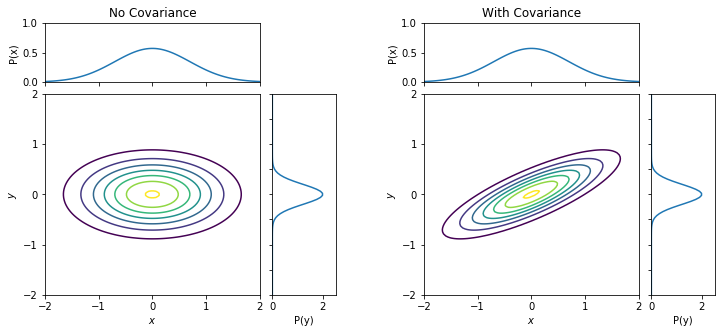

In [2]:
fig = plt.figure(figsize=(12,5))


### Without Covariance ###

mean = np.array([0.0, 0.0])
cov = np.array([[0.7, 0.0],
                [0.0, 0.2]])


xmin, xmax = -2, 2
ymin, ymax = -2, 2

tmp_x = np.linspace(xmin, xmax, 100)
tmp_y = np.linspace(ymin, ymax, 100)

XX, YY = np.meshgrid(tmp_x, tmp_y)

ZZ = stats.multivariate_normal.pdf(np.array([YY,XX]).T, mean=mean, cov=cov)

ax0 = plt.subplot2grid((4, 9), (1, 0), colspan=3, rowspan=3)
ax0.contour(XX, YY, ZZ, color='k')
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(ymin, ymax)
ax0.set_xticks(np.linspace(-2,2,5))
ax0.set_yticks(np.linspace(-2,2,5))
ax0.set_xlabel(r"$x$")
ax0.set_ylabel(r"$y$")


ax1 = plt.subplot2grid((4, 9), (0, 0), colspan=3)
ax1.plot(tmp_x, stats.norm.pdf(tmp_x, loc=mean[0], scale=cov[0,0]))
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(0, 1)
ax1.set_xticklabels([])
ax1.set_ylabel(r"P(x)")
ax1.set_title("No Covariance")


ax2 = plt.subplot2grid((4, 9), (1, 3), rowspan=3)
ax2.plot(stats.norm.pdf(tmp_y, loc=mean[1], scale=cov[1,1]), tmp_y)
ax2.set_xlim(0, 2.5)
ax2.set_ylim(-2, 2)
ax2.set_yticklabels([])
ax2.set_xlabel(r"P(y)")





#### With Covariance ####

mean = np.array([0.0, 0.0])
cov = np.array([[0.7, 0.3],
                [0.3, 0.2]])


xmin, xmax = -2, 2
ymin, ymax = -2, 2

tmp_x = np.linspace(xmin, xmax, 100)
tmp_y = np.linspace(ymin, ymax, 100)

XX, YY = np.meshgrid(tmp_x, tmp_y)

ZZ = stats.multivariate_normal.pdf(np.array([YY,XX]).T, mean=mean, cov=cov)

ax0 = plt.subplot2grid((4, 9), (1, 5), colspan=3, rowspan=3)
ax0.contour(XX, YY, ZZ, color='k')
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(ymin, ymax)
ax0.set_xticks(np.linspace(-2,2,5))
ax0.set_yticks(np.linspace(-2,2,5))
ax0.set_xlabel(r"$x$")
ax0.set_ylabel(r"$y$")


ax1 = plt.subplot2grid((4, 9), (0, 5), colspan=3)
ax1.plot(tmp_x, stats.norm.pdf(tmp_x, loc=mean[0], scale=cov[0,0]))
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(0, 1)
ax1.set_xticklabels([])
ax1.set_ylabel(r"P(x)")
ax1.set_title("With Covariance")


ax2 = plt.subplot2grid((4, 9), (1, 8), rowspan=3)
ax2.plot(stats.norm.pdf(tmp_y, loc=mean[1], scale=cov[1,1]), tmp_y)
ax2.set_xlim(0, 2.5)
ax2.set_ylim(-2, 2)
ax2.set_yticklabels([])
ax2.set_xlabel(r"P(y)")



# plt.tight_layout()
plt.show()

Let's imagine that we observe that $x=0.5$. We now want to know the probability of $y$ *given* our observed value of $x$. That is, what is $P(y\ |\ x=0.5)$?

Let's plot the two different versions below (with and without covariance)

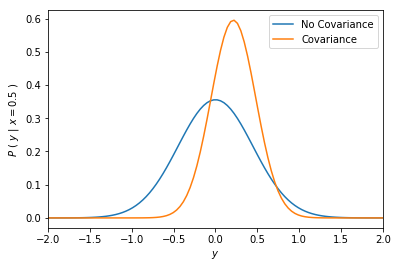

In [69]:
# Create an array of length 100 of value 0.5 for x
tmp_x = 0.5 * np.ones(100)
tmp_y = np.linspace(xmin, xmax, 100)

# Evaluate the multivariate normal distribution
mean = np.array([0.0, 0.0])
cov = np.array([[0.7, 0.0],
                [0.0, 0.2]])

P_y = stats.multivariate_normal.pdf(np.array([tmp_x,tmp_y]).T, mean=mean, cov=cov)
plt.plot(tmp_y, P_y, label="No Covariance")

mean = np.array([0.0, 0.0])
cov = np.array([[0.7, 0.3],
                [0.3, 0.2]])

P_y = stats.multivariate_normal.pdf(np.array([tmp_x,tmp_y]).T, mean=mean, cov=cov)
plt.plot(tmp_y, P_y, label="Covariance")


plt.xlim(xmin, xmax)

plt.legend(loc=1)

plt.xlabel(r"$y$")
plt.ylabel(r"$P\ (\ y\ |\ x=0.5\ )$")

plt.show()

The distributions are clearly different (although, notice that they integrate to the same value, i.e. the area under the curve is the same). Why is this? When $x$ and $y$ are covariant, the probability $y$ depends on $x$ as well, while, when $x$ and $y$ are not covariant, no dependence exists. In fact, the blue curve above is the exact same as if no observation of $x$ were taken, and it should exactly match the 1D projections in the previous plots.

Mathematically, if $x$ and $y$ have no covariance, then the following is true:

$$ P(y | x) = P(y) $$
and
$$ P(x | y) = P(x) $$

### Question: What are the units of $P(x|y)$?

Answer: $P(x|y)$ has units of $x^{-1}$

# Probability Calculus - Factoring

The next math operation we will discuss is factoring probabilities. The basic rule is the following:

$$ P(x,y) = P(x|y)\ P(y) $$

But, this can be expanded to multiple dimensions. For example, a probability with 4 variables may factor in this way:

$$ P(x_1, x_2, x_3, x_4) = P(x_1|x_2, x_3, x_4)\ P(x_2, x_3, x_4) $$

We can imagine factoring this even further:

$$ P(x_1, x_2, x_3, x_4) = P(x_1|x_2, x_3, x_4)\ P(x_2| x_3, x_4)\ P(x_3 | x_4)\ P(x_4) $$

Now, notice our covariance conditions above. The above equation may be simplified substantially, depending on the physical model.

### Question: How can you factor $P(x_1, x_2, x_3, x_4)$ given a model in which $x_1$ is dependent only on $x_4$ and $x_2$ is independent of the other 3 parameters?

Answer: We can start by taking the fully factored form of $ P(x_1, x_2, x_3, x_4)$ above and remove variables that are not dependent: $$ P(x_1, x_2, x_3, x_4) = P(x_1|x_4)\ P(x_2)\ P(x_3 | x_4)\ P(x_4) $$

We could have also reversed the last two terms for an equivalent form:
$$ P(x_1, x_2, x_3, x_4) = P(x_1|x_4)\ P(x_2)\ P(x_4 | x_3)\ P(x_3) $$

# To be explicit:

In general:    
$$ P(A, B)\ \neq\ P(A)\ P(B) $$

More accurately, 
$$ P(A, B)\ =\ P(A)\ P(B)\ {\rm iff}\ {\rm cov}(A, B)\ =\ 0$$

In practice, this complete independence of parameters is quite rare. Instead, one can calculate this probability by factoring it:
$$ P(A, B)\ =\ P(A|B)\ P(B)$$

It should be clear that the independence condition for $A$ and $B$ can be restated as $P(A|B) = P(A)$ and $P(B|A) = P(B)$.

# Example: A Gaussian distribution

Let's imagine that we have ten numbers randomly drawn from a distribution. The distribution is Gaussian, but it is not known what its mean or standard deviation is. We want to construct a mathematical framework for determining these two values. To start out with, we can think of this as a conditional probability: We want to derive a model, $M$, *given* a set of observations (or data), $D$. This is expressed as $P(M | D)$.

We cannot directly calculate $P(M | D)$, but through some factoring we can derive something close to it.

First, consider a probability over two variables, $A$ and $B$: $P(A, B)$. This probability can be factored in two ways:

$$ P(A,B) = P(A|B) P(B) $$
$$ P(A,B) = P(B|A) P(A) $$

The r.h.s of these two math statements are equivalent and can be set equal to each other:

$$ P(A|B) P(B) = P(B|A) P(A) $$

We can now solve for $P(A|B)$:

$$ P(A|B) = \frac{P(B|A) P(A)}{P(B)} $$

Returning to the problem at hand, we would like to come up with an equivalent expression for $P(M | D)$:
$$ P(M | D) = \frac{P(D|M) P(M)}{P(D)} $$

This equation is known as Bayes' Theorem and is the cornerstone of Bayesian statistics. We will go over this in detail in the future, but for now, simply note that $P(M | D) \sim P(D | M)$. Rather than calculate $P(M | D)$ (known as the posterior), we will calculate $P(D | M)$ (known as the likelihood).

To make this calculation, we first note that the data are a set of observations ($D = \{ x_i \}$) and the model is a mean and a standard deviation ($M = \mu, \sigma$). Therefore:

$$ P(D | M) = P(\{ x_i \}\ |\ \mu, \sigma) $$

Furthermore, since each observation is independent:

$$ P(\{ x_i \}\ |\ \mu, \sigma) = \prod_i P( x_i\ |\ \mu, \sigma) $$

And how do we calculate $P( x_i\ |\ \mu, \sigma)$? Well, that is simply the value of the normalized Gaussian distribution at that particular $x_i$. Let's show this with figures below.

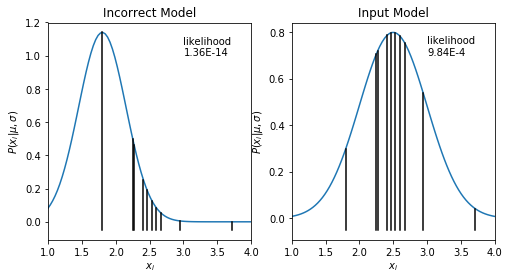

In [188]:
N_samples = 10

fig, ax = plt.subplots(1, 2, figsize=(8,4))

# The values of the Gaussian
mean, std_dev = 2.5, 0.5

# Randomly draw 10 values
x_i = stats.norm.rvs(loc=mean, scale=std_dev, size=N_samples)


##### Wrong values #####
# Let's calculate the likelihood of these data using the wrong model:
mean_test = 1.8
std_dev_test = 0.35
tmp_x = np.linspace(0.5, 4.0, 100)
ax[0].plot(tmp_x, stats.norm.pdf(tmp_x, loc=mean_test, scale=std_dev_test))

# Plot the data points as vertical lines
for i in range(len(x_i)):
    ax[0].plot([x_i[i],x_i[i]], [-0.05,stats.norm.pdf(x_i[i], loc=mean_test, scale=std_dev_test)], color='k')

likelihood = np.product(stats.norm.pdf(x_i, loc=mean_test, scale=std_dev_test))
likelihood = "likelihood \n{:.2E}".format(Decimal(likelihood))
ax[0].text(3.0, 1.0, str(likelihood))
ax[0].set_title("Incorrect Model")

##### Correct values #####
# Let's calculate the likelihood of these data using the wrong model:
mean_test = 2.5
std_dev_test = 0.5
tmp_x = np.linspace(0.5, 4.0, 100)
ax[1].plot(tmp_x, stats.norm.pdf(tmp_x, loc=mean_test, scale=std_dev_test))

# Plot the data points as vertical lines
for i in range(len(x_i)):
    ax[1].plot([x_i[i],x_i[i]], [-0.05,stats.norm.pdf(x_i[i], loc=mean_test, scale=std_dev_test)], color='k')

likelihood = np.product(stats.norm.pdf(x_i, loc=mean_test, scale=std_dev_test))
likelihood = "likelihood \n{:.2E}".format(Decimal(likelihood))
ax[1].text(3.0, 0.7, str(likelihood))
ax[1].set_title("Input Model")
    
    
    
for i in range(2):    
    ax[i].set_xlim(1.0,4.0)
    ax[i].set_xlabel(r"$x_i$")
    ax[i].set_ylabel(r"$P(x_i | \mu, \sigma)$")

    
plt.show()

Obviously, by eye the incorrect model is not as good as the input model, but the likelihood gives us a quantitative function by which we can measure how good of a model it is. Below, we make a 2D map in $(\mu, \sigma)$ space of the likelihood function.

Often it is easier for solvers to use the log of the likelihood instead of the likelihood. We will do this below.

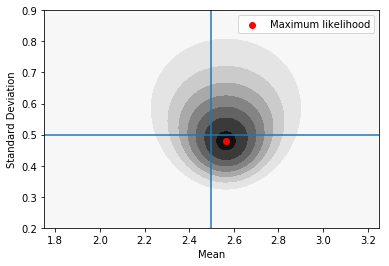

In [189]:
def calc_ln_likelihood(x_i, mean, std_dev):
    return np.sum(np.log(stats.norm.pdf(x_i, loc=mean, scale=std_dev)))

# Maximum likelihood value
def neg_likelihood(M, x_i):
    mean, std_dev = M    
    return -1.0 * calc_ln_likelihood(x_i, mean, std_dev)


xmin, xmax = 1.75, 3.25
ymin, ymax = 0.2, 0.9

tmp_x = np.linspace(xmin, xmax, 100)
tmp_y = np.linspace(ymin, ymax, 100)

XX, YY = np.meshgrid(tmp_x, tmp_y)
ZZ = np.zeros(shape=XX.shape)

for i in range(XX.shape[0]):
    for j in range(XX.shape[1]):
        ZZ[i,j] = calc_likelihood(x_i, XX[i,j], YY[i,j])
        
# Plot contours
plt.contourf(XX, YY, ZZ, cmap='Greys')

# Plot input value
plt.axhline(std_dev)
plt.axvline(mean)

x0 = np.array([2.4, 0.4])
res = minimize(neg_likelihood, x0, args=(x_i,))
if res.success == True:
    plt.scatter(res.x[0], res.x[1], color='r', label='Maximum likelihood')
else:
    print("Maximum likelihood could not be found")
    
plt.xlabel("Mean")
plt.ylabel("Standard Deviation")

plt.legend()
plt.show()

# Example - Fitting a spectrum

Now, we will try something slightly different. Imagine you have a spectrum and you want to fit an absorption line. We can construct a simple model composed of a line representing the continuum and a Gaussian dip representing the feature itself that (locally) fits the spectrum. Our model therefore has 5 parameters: slope ($m$), intercept ($b$), central wavelength ($\lambda_0$), width ($\sigma$), and strength ($C$).

This model is a *generative* model, which means it can (artifically) generate observations. We want to compare the model's spectrum with the observed spectrum. Our likelihood function then looks like this:

$$ P(\{x_i\}\ |\ m, b, \lambda_0, {\rm EW}) = m*\lambda + b - C * \exp\left[- \frac{(\lambda-\lambda_0)^2}{\sigma^2} \right] $$

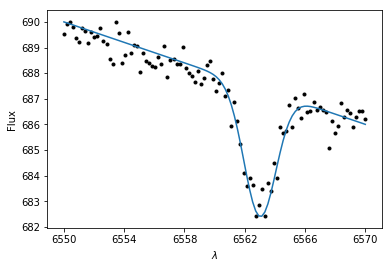

In [202]:
# Input model values
m = -0.2
b = 2000.0
lamb_0 = 6563.
sigma = 1.5
C = 5.0

# Let's plot the spectrum
lamb = np.linspace(6550, 6570, 100)
flux = m*lamb + b - C*np.exp(-(lamb-lamb_0)**2 / sigma**2)
plt.plot(lamb,flux, label="Input Model")


# Now, let's "observe" this model by adding noise
x_i = flux + stats.norm.rvs(0.0, 0.5, len(flux))
plt.scatter(lamb, x_i, marker='.', color='k')


plt.axes().set_xticks(np.linspace(6550, 6570, 6))
plt.xlabel(r"$\lambda$")
plt.ylabel("Flux")
plt.show()

### Exercise: We want to find the best fit model parameters for this spectrum. I will provide the code for the model and the minimization routine. Discuss with your partner a possibility for what the likelihood function should look like and implement it in the code block below.

In [244]:
def neg_ln_likelihood(M, lamb, x_i):
    m, b, lamb_0, sigma, C = M
    
    x_model = m*lamb + b - C*np.exp(-(lamb-lamb_0)**2 / sigma**2)
    
#     # L1 loss function
#     likelihood = np.abs(x_model - x_i)
    # L2 loss function
    likelihood = (x_model - x_i)**2
    
    return np.sum(likelihood)

True Model
-0.2 -0.195042036178
2000.0 1967.30108685
6563.0 6562.93485363
1.5 1.41637426962
5.0 4.52420381441


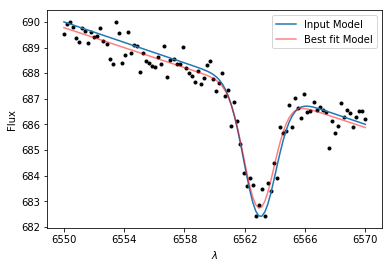

In [245]:
x0 = np.array([-0.05, 1700, 6563, 2.0, 4.0])
res = minimize(neg_ln_likelihood, x0, args=(lamb, x_i))

print("True Model")
x_true = np.array([-0.2, 2000.0, 6563., 1.5, 5.0])
for i in range(len(x_true)):
    print(x_true[i], res.x[i])
# print(res.x)


# Input model
plt.plot(lamb, flux, label="Input Model")

# Observations
plt.scatter(lamb, x_i, marker='.', color='k')


# Best-fit model
m, b, lamb_0, sigma, C = res.x
x_model = m*lamb + b - C*np.exp(-(lamb-lamb_0)**2 / sigma**2)
plt.plot(lamb, x_model, color='r', alpha=0.5, label="Best fit Model")




plt.legend()

plt.axes().set_xticks(np.linspace(6550, 6570, 6))
plt.xlabel(r"$\lambda$")
plt.ylabel("Flux")
plt.show()

# Probability Calculus - Marginalization

This is a key concept. Let's say you want to calculate $P(x)$, but you cannot immediately calculate $P(x)$ (or maybe it is too difficult to calculate). However, you can calculate $P(x|y)$ where $y$ is some well understood parameter that has a known $P(y)$ (we will get to specific examples in a minute). We can solve for $P(x)$ by *marginalizing* over the separate parameter $y$:

$$ P(x) = \int P(x,y)\ dy $$
$$ P(x) = \int P(x|y)\ P(y)\ dy $$

Now, this integral can be calculated since both functions are known. Note that this mathematical procedure be derived from our normalization equations shown above.